In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,log_loss
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Simulation of some data
np.random.seed (245)
nobs =1000
x1= np.random.normal(size=nobs ,scale=1)
x2= np.random.normal(size=nobs ,scale=1)
x3= np.random.normal(size=nobs ,scale=1)
X= np.c_[np.ones((nobs ,1)),x1,x2,x3]


y= -1.5 + -0.5*x1**2 -0.5*x2**2 +0.25*x3**2 + np.random.normal(size=nobs , scale=1) # width irreducable error ist 1



OLS=sm.OLS(y,X).fit()
y_pred_OLS=OLS.predict(X)

In [5]:
X[:,0:5]

array([[ 1.        , -0.23276742,  2.21909962, -1.00408117],
       [ 1.        ,  0.81853041,  0.51334014,  0.86191678],
       [ 1.        , -0.97334932, -3.00031139,  0.86598633],
       ...,
       [ 1.        ,  1.62168608, -0.91076001, -0.60039352],
       [ 1.        , -0.18710805,  0.74539444, -0.31463947],
       [ 1.        , -1.39579166, -1.03862314,  0.32594296]])

In [6]:
y[0:5]

array([-5.14038861, -1.56918942, -5.63452662, -1.37463074, -1.13933778])

(array([  3.,  14.,  34., 100., 212., 281., 256.,  81.,  15.,   4.]),
 array([-7.86412286, -6.83753031, -5.81093776, -4.78434521, -3.75775266,
        -2.73116011, -1.70456756, -0.67797501,  0.34861754,  1.3752101 ,
         2.40180265]),
 <a list of 10 Patch objects>)

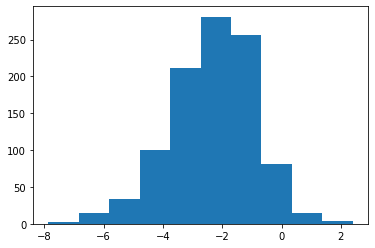

In [7]:
plt.hist(y)

## OLS Regression

In [8]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.208
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.306
Time:                        14:21:50   Log-Likelihood:                -1776.1
No. Observations:                1000   AIC:                             3560.
Df Residuals:                     996   BIC:                             3580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3196      0.045    -51.122      0.0

## The Neural Network

### Hyper parameters

In [10]:
#Learningrate
LR=0.01
# Number of neurons
Neuron_Out=1
Neuron_Hidden=50
#The Activation function
Activate_output='linear'
Activate_hidden='sigmoid'
#The Optimizer
Optimizer= SGD(lr=LR)
# The loss function
loss='mean_squared_error'

### Construct the Neural Network

In [12]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)

#Initialize the ANN
model_ANN= Sequential()

# Hidden Layer
model_ANN.add(Dense(Neuron_Hidden, activation=Activate_hidden, input_shape=(4,), use_bias=True))

#model_ANN.add(Dense(Neuron_Hidden, activation=Activate_hidden, input_shape=(4,), use_bias=True))

#Output Layer
model_ANN.add(Dense(Neuron_Out, activation=Activate_output,use_bias=True))
model_ANN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ich schätze jetzt für jedes Neuron ein Bias dazu!
# 50 bias + 200 Parameter/Gewichte in Hidden-Layer -> von jedem x/Input-Neuron zu jedem Hidden-Layer-Neuron habe ich ein Verbindung!
# 1 bias + 50 Parameter/Gewichte in Output-Layer -> von jedem Hidden-Layer-Neuron zu einer Output-Neuron


# ال ٥٠ الجديدة هي تعتبر البايس شي اضافي لكل نيرون

### Compile the Neural Network

In [13]:
model_ANN.compile(optimizer=Optimizer , loss=loss)

### Fit the Neural Network

In [14]:
#Fit the model
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=1500,verbose=1)



Epoch 1/1500
1000/1000 [==============================] - 4s 4ms/step - loss: 2.5809
Epoch 2/1500
1000/1000 [==============================] - 0s 70us/step - loss: 2.0597
Epoch 3/1500
1000/1000 [==============================] - 0s 65us/step - loss: 2.0588
Epoch 4/1500
1000/1000 [==============================] - 0s 65us/step - loss: 2.0670
Epoch 5/1500
1000/1000 [==============================] - 0s 67us/step - loss: 2.0625
Epoch 6/1500
1000/1000 [==============================] - 0s 74us/step - loss: 2.0465
Epoch 7/1500
1000/1000 [==============================] - 0s 63us/step - loss: 2.0573
Epoch 8/1500
1000/1000 [==============================] - 0s 68us/step - loss: 2.0589
Epoch 9/1500
1000/1000 [==============================] - 0s 65us/step - loss: 2.0558
Epoch 10/1500
1000/1000 [==============================] - 0s 67us/step - loss: 2.0554
Epoch 11/1500
1000/1000 [==============================] - 0s 72us/step - loss: 2.0402
Epoch 12/1500
1000/1000 [==========================

1000/1000 [==============================] - 0s 66us/step - loss: 1.3786
Epoch 184/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.3661
Epoch 185/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.3571
Epoch 186/1500
1000/1000 [==============================] - 0s 59us/step - loss: 1.3551
Epoch 187/1500
1000/1000 [==============================] - 0s 59us/step - loss: 1.3499
Epoch 188/1500
1000/1000 [==============================] - 0s 63us/step - loss: 1.3467
Epoch 189/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.3464
Epoch 190/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.3372
Epoch 191/1500
1000/1000 [==============================] - 0s 60us/step - loss: 1.3325
Epoch 192/1500
1000/1000 [==============================] - 0s 60us/step - loss: 1.3313
Epoch 193/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.3259
Epoch 194/1500
1000/1000 [=====================

1000/1000 [==============================] - 0s 66us/step - loss: 1.1116
Epoch 370/1500
1000/1000 [==============================] - 0s 60us/step - loss: 1.1085
Epoch 371/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.1136
Epoch 372/1500
1000/1000 [==============================] - 0s 63us/step - loss: 1.1055
Epoch 373/1500
1000/1000 [==============================] - 0s 63us/step - loss: 1.1034
Epoch 374/1500
1000/1000 [==============================] - 0s 60us/step - loss: 1.1023
Epoch 375/1500
1000/1000 [==============================] - 0s 60us/step - loss: 1.1040
Epoch 376/1500
1000/1000 [==============================] - 0s 59us/step - loss: 1.1060
Epoch 377/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0987
Epoch 378/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.1037
Epoch 379/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.1007
Epoch 380/1500
1000/1000 [=====================

Epoch 555/1500
1000/1000 [==============================] - 0s 68us/step - loss: 1.0252
Epoch 556/1500
1000/1000 [==============================] - 0s 68us/step - loss: 1.0238
Epoch 557/1500
1000/1000 [==============================] - 0s 70us/step - loss: 1.0269
Epoch 558/1500
1000/1000 [==============================] - 0s 68us/step - loss: 1.0252
Epoch 559/1500
1000/1000 [==============================] - 0s 69us/step - loss: 1.0294
Epoch 560/1500
1000/1000 [==============================] - 0s 67us/step - loss: 1.0266
Epoch 561/1500
1000/1000 [==============================] - 0s 71us/step - loss: 1.0277
Epoch 562/1500
1000/1000 [==============================] - 0s 70us/step - loss: 1.0290
Epoch 563/1500
1000/1000 [==============================] - 0s 75us/step - loss: 1.0299
Epoch 564/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0226
Epoch 565/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.0296
Epoch 566/1500
1000/1000 [======

1000/1000 [==============================] - 0s 62us/step - loss: 1.0151
Epoch 742/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0112
Epoch 743/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0170
Epoch 744/1500
1000/1000 [==============================] - 0s 64us/step - loss: 1.0128
Epoch 745/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0124
Epoch 746/1500
1000/1000 [==============================] - 0s 68us/step - loss: 1.0191
Epoch 747/1500
1000/1000 [==============================] - 0s 64us/step - loss: 1.0076
Epoch 748/1500
1000/1000 [==============================] - 0s 64us/step - loss: 1.0167
Epoch 749/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0137
Epoch 750/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0135
Epoch 751/1500
1000/1000 [==============================] - 0s 66us/step - loss: 1.0086
Epoch 752/1500
1000/1000 [=====================

1000/1000 [==============================] - 0s 76us/step - loss: 1.0091
Epoch 835/1500
1000/1000 [==============================] - 0s 79us/step - loss: 1.0070
Epoch 836/1500
1000/1000 [==============================] - 0s 72us/step - loss: 1.0098
Epoch 837/1500
1000/1000 [==============================] - 0s 59us/step - loss: 1.0097
Epoch 838/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0120
Epoch 839/1500
1000/1000 [==============================] - 0s 56us/step - loss: 1.0112
Epoch 840/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0088
Epoch 841/1500
1000/1000 [==============================] - 0s 56us/step - loss: 1.0093
Epoch 842/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.0087
Epoch 843/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0160
Epoch 844/1500
1000/1000 [==============================] - 0s 54us/step - loss: 1.0131
Epoch 845/1500
1000/1000 [=====================

1000/1000 [==============================] - 0s 63us/step - loss: 1.0047
Epoch 1021/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.0050
Epoch 1022/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0025
Epoch 1023/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0038
Epoch 1024/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0016
Epoch 1025/1500
1000/1000 [==============================] - 0s 59us/step - loss: 1.0029
Epoch 1026/1500
1000/1000 [==============================] - 0s 61us/step - loss: 0.9988
Epoch 1027/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0054
Epoch 1028/1500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0021
Epoch 1029/1500
1000/1000 [==============================] - 0s 58us/step - loss: 1.0058
Epoch 1030/1500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0048
Epoch 1031/1500
1000/1000 [==========

1000/1000 [==============================] - 0s 58us/step - loss: 0.9997
Epoch 1205/1500
1000/1000 [==============================] - 0s 58us/step - loss: 0.9996
Epoch 1206/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0029
Epoch 1207/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9946
Epoch 1208/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0063
Epoch 1209/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0000
Epoch 1210/1500
1000/1000 [==============================] - 0s 57us/step - loss: 1.0017
Epoch 1211/1500
1000/1000 [==============================] - 0s 54us/step - loss: 1.0031
Epoch 1212/1500
1000/1000 [==============================] - 0s 56us/step - loss: 0.9968
Epoch 1213/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9991
Epoch 1214/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9930
Epoch 1215/1500
1000/1000 [==========

1000/1000 [==============================] - 0s 52us/step - loss: 0.9940
Epoch 1389/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9980
Epoch 1390/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9994
Epoch 1391/1500
1000/1000 [==============================] - 0s 53us/step - loss: 1.0017
Epoch 1392/1500
1000/1000 [==============================] - 0s 53us/step - loss: 0.9977
Epoch 1393/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9948
Epoch 1394/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9914
Epoch 1395/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9951
Epoch 1396/1500
1000/1000 [==============================] - 0s 53us/step - loss: 0.9943
Epoch 1397/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9958
Epoch 1398/1500
1000/1000 [==============================] - 0s 52us/step - loss: 0.9969
Epoch 1399/1500
1000/1000 [==========

1000/1000 [==============================] - 0s 52us/step - loss: 0.9963
Epoch 1481/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9979
Epoch 1482/1500
1000/1000 [==============================] - 0s 58us/step - loss: 0.9884
Epoch 1483/1500
1000/1000 [==============================] - 0s 65us/step - loss: 0.9969
Epoch 1484/1500
1000/1000 [==============================] - 0s 66us/step - loss: 0.9939
Epoch 1485/1500
1000/1000 [==============================] - 0s 103us/step - loss: 0.9996
Epoch 1486/1500
1000/1000 [==============================] - 0s 61us/step - loss: 0.9954
Epoch 1487/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9931
Epoch 1488/1500
1000/1000 [==============================] - 0s 57us/step - loss: 0.9954
Epoch 1489/1500
1000/1000 [==============================] - 0s 59us/step - loss: 0.9970
Epoch 1490/1500
1000/1000 [==============================] - 0s 67us/step - loss: 0.9935
Epoch 1491/1500
1000/1000 [=========

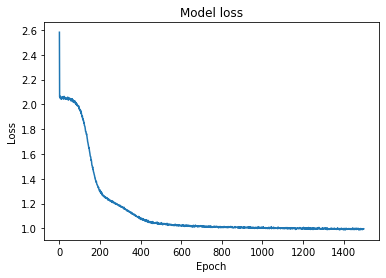

In [15]:
plt.plot(history_ANN.history['loss'])
#plt.plot(history_ANN.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Nachteil von Bias dass wir mehr Parameter schätzen müssen
# Vorteil ist enorme Flexibilitätgewinn

# Hier haben wir Verlust Kurve

In [16]:
print('Weights connecting the constant to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][0])

Weights connecting the constant to 50 Neurons in the Hidden layer 

 [ 7.5279795e-02 -3.3444804e-01 -5.0436229e-01 -1.6734356e-01
 -4.5762432e-01  3.7363742e-03 -2.1648550e+00  4.5432529e-04
  3.8841209e-01 -6.3030116e-02  4.4517198e-01  3.9330430e-02
 -6.4394638e-02  3.2015938e-01  6.9840051e-02 -1.5865813e+00
 -1.1206200e+00 -2.1155891e-01 -4.6930659e-01  1.0279710e-01
 -1.1404994e+00 -3.6076239e-01 -2.3155160e-02 -1.6832930e-01
 -7.5699037e-01  3.7538078e-01  1.4508402e-01 -2.1413556e-01
 -2.5733429e-01  3.6262575e-01 -1.5676280e+00 -1.6650605e-01
  1.2910403e-02  2.3023024e-01 -3.6600259e-01 -4.3782523e-01
  5.6789404e-01  2.2065018e-01  6.3193381e-02 -5.9632447e-02
 -2.0618317e+00 -3.3898988e-01 -4.4439590e-01  1.8976743e+00
  1.6849654e+00  3.4573611e-02 -2.2306274e-01  2.4568136e-01
 -1.0281075e+00 -8.3585292e-01]


In [17]:
print('Weights connecting X1 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X1 to 50 Neurons in the Hidden layer 

 [-0.06675116  0.25659084 -0.5841759  -0.23036386 -0.17676121  0.24603006
 -0.67958975 -0.12613532 -0.04925295 -0.08512808  0.1699547  -0.04795897
 -0.4398147   0.45288756 -0.18731095  0.773206    0.14245118 -0.16315429
  0.33307952  0.0060856   0.17126466  0.21687695 -0.23360288  0.26510644
 -0.7563679  -0.05037618  0.26200226  0.1712327   0.49115703 -0.5159111
 -0.00224628  0.17778024 -0.12705638 -0.05045766 -0.01179971 -0.60160065
  0.03441931 -0.18070602 -0.04516286  0.08304817 -1.6415929   0.06478118
  0.42791712 -1.839162   -0.03462196  0.08633856 -0.38202557 -0.290167
 -0.9026075  -0.77912796]


In [18]:
print('Weights connecting X2 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][2])

Weights connecting X2 to 50 Neurons in the Hidden layer 

 [-0.35813227  0.2961514  -0.1890602  -0.1473208  -0.04565484 -0.19144244
  1.812896    0.1656411  -0.44587815  0.22195397  0.10410938 -0.2578459
 -0.30714333  0.00497818 -0.06584312 -1.2615454   1.3574516  -0.3973944
  0.41211346 -0.15746854  1.1417005  -0.06444208  0.00366594  0.06039341
  0.2545018  -0.38913614  0.07207343 -0.28957072  0.19437976 -0.13914475
  0.21299976 -0.21304296  0.04608353 -0.3427281   0.1423571  -0.2520099
 -0.19764657 -0.17955752 -0.22160903  0.07501768 -1.1185248   0.3433039
  0.59697145 -0.5871735  -0.04207051 -0.1623186  -0.04359173  0.24354039
  0.2594239   0.18028204]


In [19]:
print('Weights connecting X3 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X3 to 50 Neurons in the Hidden layer 

 [-0.06675116  0.25659084 -0.5841759  -0.23036386 -0.17676121  0.24603006
 -0.67958975 -0.12613532 -0.04925295 -0.08512808  0.1699547  -0.04795897
 -0.4398147   0.45288756 -0.18731095  0.773206    0.14245118 -0.16315429
  0.33307952  0.0060856   0.17126466  0.21687695 -0.23360288  0.26510644
 -0.7563679  -0.05037618  0.26200226  0.1712327   0.49115703 -0.5159111
 -0.00224628  0.17778024 -0.12705638 -0.05045766 -0.01179971 -0.60160065
  0.03441931 -0.18070602 -0.04516286  0.08304817 -1.6415929   0.06478118
  0.42791712 -1.839162   -0.03462196  0.08633856 -0.38202557 -0.290167
 -0.9026075  -0.77912796]


In [20]:
print('Bias of 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Bias of 50 Neurons in the Hidden layer 

 [-0.06675116  0.25659084 -0.5841759  -0.23036386 -0.17676121  0.24603006
 -0.67958975 -0.12613532 -0.04925295 -0.08512808  0.1699547  -0.04795897
 -0.4398147   0.45288756 -0.18731095  0.773206    0.14245118 -0.16315429
  0.33307952  0.0060856   0.17126466  0.21687695 -0.23360288  0.26510644
 -0.7563679  -0.05037618  0.26200226  0.1712327   0.49115703 -0.5159111
 -0.00224628  0.17778024 -0.12705638 -0.05045766 -0.01179971 -0.60160065
  0.03441931 -0.18070602 -0.04516286  0.08304817 -1.6415929   0.06478118
  0.42791712 -1.839162   -0.03462196  0.08633856 -0.38202557 -0.290167
 -0.9026075  -0.77912796]


In [21]:
print('Weights connecting the 50 Neurons in the Hidden layer to the Output layer\n\n',model_ANN.layers[1].get_weights()[0])

Weights connecting the 50 Neurons in the Hidden layer to the Output layer

 [[-0.21054165]
 [ 0.03328189]
 [-0.6230547 ]
 [ 0.25502804]
 [ 0.6376444 ]
 [-1.6301942 ]
 [-2.6961825 ]
 [ 0.07979663]
 [ 0.31226432]
 [ 0.19873151]
 [-0.44554523]
 [-0.06945932]
 [ 0.38353133]
 [ 0.41427588]
 [-0.21079338]
 [-4.1755085 ]
 [-1.5597185 ]
 [-0.18377623]
 [-0.30347496]
 [-0.26457933]
 [-1.2832437 ]
 [-0.15401505]
 [-0.06933137]
 [ 0.2961254 ]
 [-0.82421356]
 [-0.6356482 ]
 [ 0.13703279]
 [-0.12353086]
 [-0.30015823]
 [ 0.468023  ]
 [ 2.658622  ]
 [ 0.11752713]
 [ 0.04999107]
 [ 0.2390372 ]
 [ 0.31351534]
 [-0.52932054]
 [-0.75786144]
 [-0.3069164 ]
 [-0.04387174]
 [ 0.23525971]
 [-3.756018  ]
 [ 0.46357545]
 [-0.5775165 ]
 [ 2.7632556 ]
 [-2.0047817 ]
 [-0.20724653]
 [-0.00876911]
 [ 0.27427143]
 [-1.1644158 ]
 [-0.79100865]]


In [22]:
print('Bias of 50 Neurons in the Output Layer \n\n',model_ANN.layers[1].get_weights()[0][1])

Bias of 50 Neurons in the Output Layer 

 [0.03328189]


In [26]:
#Evaluate the fit
y_pred_ANN=model_ANN.predict(X)
print("MSE ANN:", mean_squared_error(np.ravel(y), np.ravel(y_pred_ANN )))
print("MSE OLS:", mean_squared_error(np.ravel(y), np.ravel(y_pred_OLS )))

# اسع بالمحاضرة كانت القيمة ١.١ وليست ٠.٩٨
# وهو قال انه وصلنا لاحسن قيمة لانه مافينا ننزل تحت ١ للي هو 
# normal verteilte Fehler= irreducable error اللي عرفناه فوق مع ابسلون

MSE ANN: 0.9863178133218239
MSE OLS: 2.0428623165804765


### Real Fit Plot Neural Network

(-8.86412286072964, 3.401802646419812)

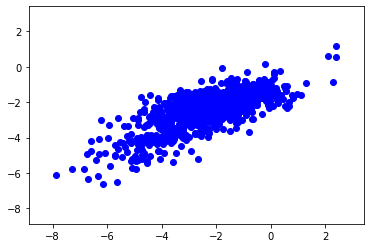

In [27]:
plt.plot(np.ravel(y),np.ravel(y_pred_ANN), 'bo')
plt.xlim((min(y)-1,max(y)+1))
plt.ylim((min(y)-1,max(y)+1))

### Real Fit Plot OLS

(-8.86412286072964, 3.401802646419812)

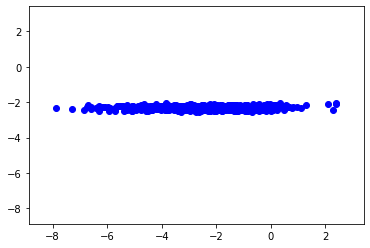

In [28]:
plt.plot(np.ravel(y),np.ravel(y_pred_OLS), 'bo')
plt.xlim((min(y)-1,max(y)+1))
plt.ylim((min(y)-1,max(y)+1))